# Hyperparameter Optimization (HPO) of Machine Learning Models

### **Sample code for classification problems**  
**Dataset used:**  
&nbsp; blood transfusion service center

**Machine learning algorithms used:**  
&nbsp; Random forest (RF), support vector machine (SVM), k-nearest neighbor (KNN), artificial neural network (ANN)

**HPO algorithms used:**  
&nbsp; Grid search, random search, hyperband, Bayesian Optimization with Gaussian Processes (BO-GP), Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE), particle swarm optimization (PSO), genetic algorithm (GA).

**Performance metric:**  
&nbsp; Classification accuracy

In [1]:
import os

def install_packages(packages):
    for package in packages:
        !pip install -q {package}

packages_to_install = [
    "tensorflow~=2.11",
    "scikeras",
    "keras",
    "seaborn",
    "Optunity",
    "sklearn-deap",
    "colorama",
    "scikit-optimize",
    "hyperopt",
    "tpot",
    "ipykernel",
    "jupyter",
    "scikeras[tensorflow]",
    "arff",
    "tqdm",
    "ucimlrepo"
]

install_packages(packages_to_install)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import keras
import sys
import urllib.request
import arff
import os
import torch
import torchvision
import torchvision.transforms as transforms
from tpot import TPOTClassifier
from random import randint
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,make_scorer, recall_score, f1_score, precision_score, log_loss
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend
from sklearn import datasets
from random import randrange as sp_randrange
from scipy.stats import randint as sp_randint
from pandas import read_csv
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from random import randrange as sp_randrange
from sklearn.neural_network import MLPRegressor
from skopt import Optimizer
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

## Load dataset


In [51]:
# fetch dataset
blood_transfusion_service_center = fetch_ucirepo(id=176)

# data (as pandas dataframes)
X = blood_transfusion_service_center.data.features
y = blood_transfusion_service_center.data.targets

# metadata
print(blood_transfusion_service_center.metadata)

# variable information
print(blood_transfusion_service_center.variables)

print(X)
print(y)

{'uci_id': 176, 'name': 'Blood Transfusion Service Center', 'repository_url': 'https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center', 'data_url': 'https://archive.ics.uci.edu/static/public/176/data.csv', 'abstract': 'Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem. ', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 748, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Donated_Blood'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5GS39', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Knowledge discovery on RFM model using Bernoulli sequence', 'authors': 'I. Yeh, K. Yang, Tao-Ming Ting', 'published_in': 'Expert systems with applications', 'year': 2009, 'url': 'https://www.semantics

**Preprocessing**

In [52]:
import numpy as np
from collections import Counter

y_values = y.values.ravel()

#The target attribute is a binary variable representing whether he/she donated blood in March 2007 (2 stands for donating blood; 1 stands for not donating blood).
class_names = {0: "Non ha donato", 1: "Ha donato"}

class_counts = Counter(y_values)
total_samples = len(y_values)

print("Analisi del bilancio delle classi per il dataset di donazione di sangue:")
print("---------------------------------------------------------------------")
for class_label, count in class_counts.items():
    percentage = (count / total_samples) * 100
    class_name = class_names[class_label]
    print(f"Classe {class_label} ({class_name}): {count} campioni ({percentage:.2f}%)")

print(f"\nCampioni totali: {total_samples}")

# Rapporto di sbilanciamento
if len(class_counts) == 2:
    minority_class = min(class_counts, key=class_counts.get)
    majority_class = max(class_counts, key=class_counts.get)
    imbalance_ratio = class_counts[majority_class] / class_counts[minority_class]
    print(f"\nRapporto di sbilanciamento ({class_names[majority_class]}:{class_names[minority_class]}): {imbalance_ratio:.2f}:1")

Analisi del bilancio delle classi per il dataset di donazione di sangue:
---------------------------------------------------------------------
Classe 1 (Ha donato): 178 campioni (23.80%)
Classe 0 (Non ha donato): 570 campioni (76.20%)

Campioni totali: 748

Rapporto di sbilanciamento (Non ha donato:Ha donato): 3.20:1


In [53]:
def analyze_feature_balance(X, feature_name):
    if X[feature_name].dtype in ['int64', 'float64']:
        # Per feature numeriche
        bins = pd.cut(X[feature_name], bins=5)
        counts = bins.value_counts().sort_index()
        total = len(X)
        print(f"\nDistribuzione della feature '{feature_name}':")
        for bin_range, count in counts.items():
            percentage = (count / total) * 100
            print(f"  {bin_range}: {count} campioni ({percentage:.2f}%)")
    else:
        # Per feature categoriche
        counts = X[feature_name].value_counts()
        total = len(X)
        print(f"\nDistribuzione della feature '{feature_name}':")
        for value, count in counts.items():
            percentage = (count / total) * 100
            print(f"  {value}: {count} campioni ({percentage:.2f}%)")

# Analisi del dataset della donazione di sangue
blood_donation = fetch_ucirepo(id=176)
X_blood = blood_donation.data.features
print("\n\nAnalisi del bilanciamento delle feature per il dataset della donazione di sangue:")
print("--------------------------------------------------------------------------------")
for column in X_blood.columns:
    analyze_feature_balance(X_blood, column)



Analisi del bilanciamento delle feature per il dataset della donazione di sangue:
--------------------------------------------------------------------------------

Distribuzione della feature 'Recency':
  (-0.074, 14.8]: 575 campioni (76.87%)
  (14.8, 29.6]: 166 campioni (22.19%)
  (29.6, 44.4]: 5 campioni (0.67%)
  (44.4, 59.2]: 0 campioni (0.00%)
  (59.2, 74.0]: 2 campioni (0.27%)

Distribuzione della feature 'Frequency':
  (0.951, 10.8]: 645 campioni (86.23%)
  (10.8, 20.6]: 86 campioni (11.50%)
  (20.6, 30.4]: 9 campioni (1.20%)
  (30.4, 40.2]: 3 campioni (0.40%)
  (40.2, 50.0]: 5 campioni (0.67%)

Distribuzione della feature 'Monetary':
  (237.75, 2700.0]: 645 campioni (86.23%)
  (2700.0, 5150.0]: 86 campioni (11.50%)
  (5150.0, 7600.0]: 9 campioni (1.20%)
  (7600.0, 10050.0]: 3 campioni (0.40%)
  (10050.0, 12500.0]: 5 campioni (0.67%)

Distribuzione della feature 'Time':
  (1.904, 21.2]: 268 campioni (35.83%)
  (21.2, 40.4]: 236 campioni (31.55%)
  (40.4, 59.6]: 119 campioni (1

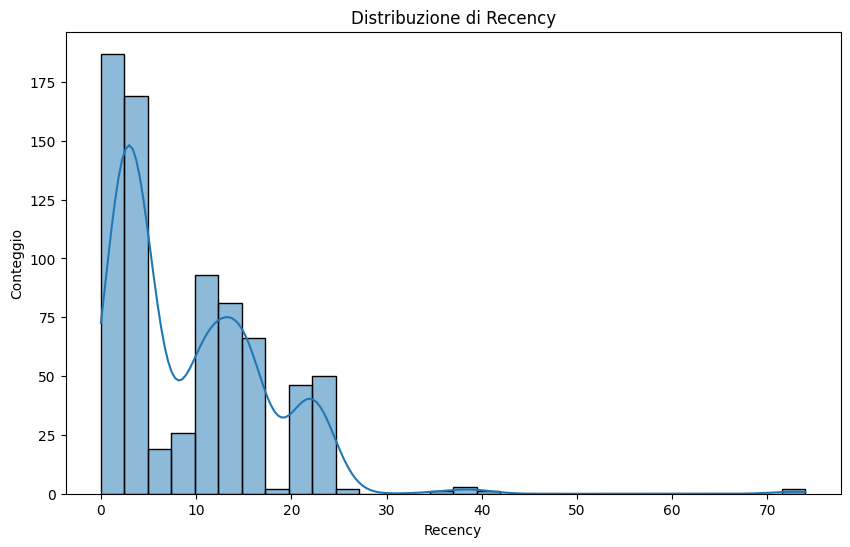

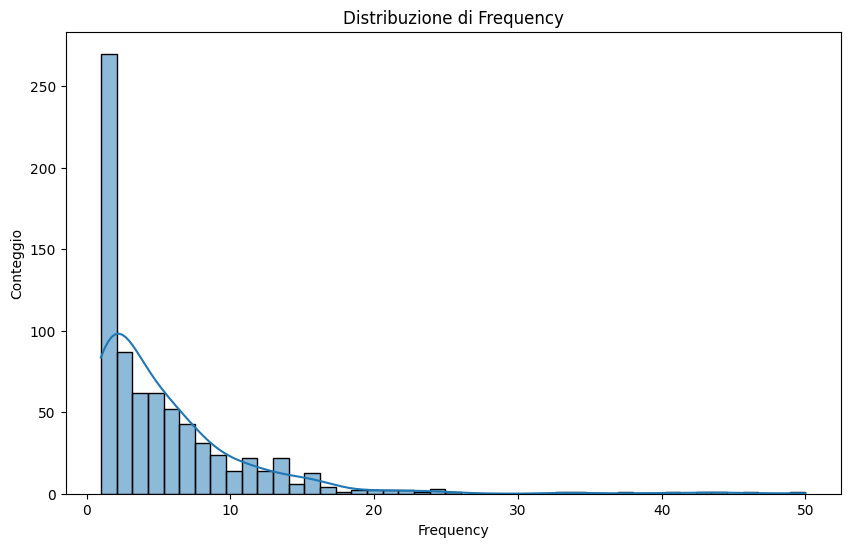

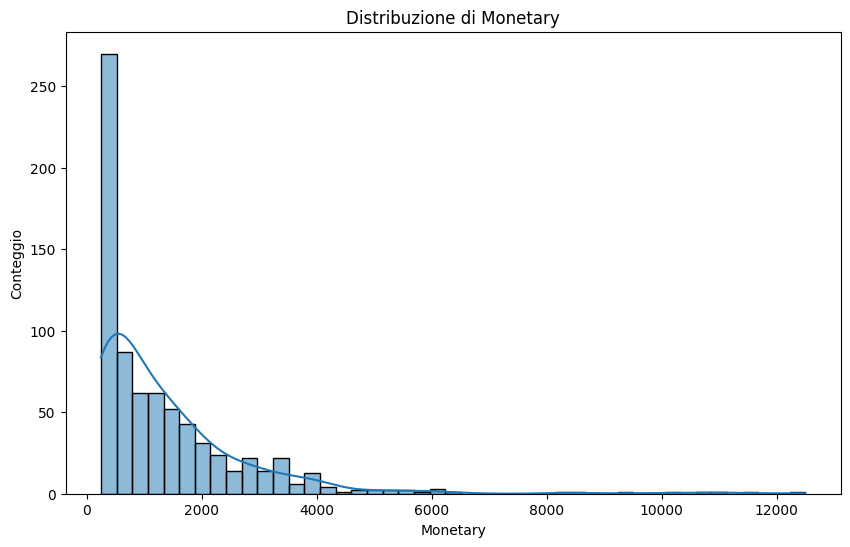

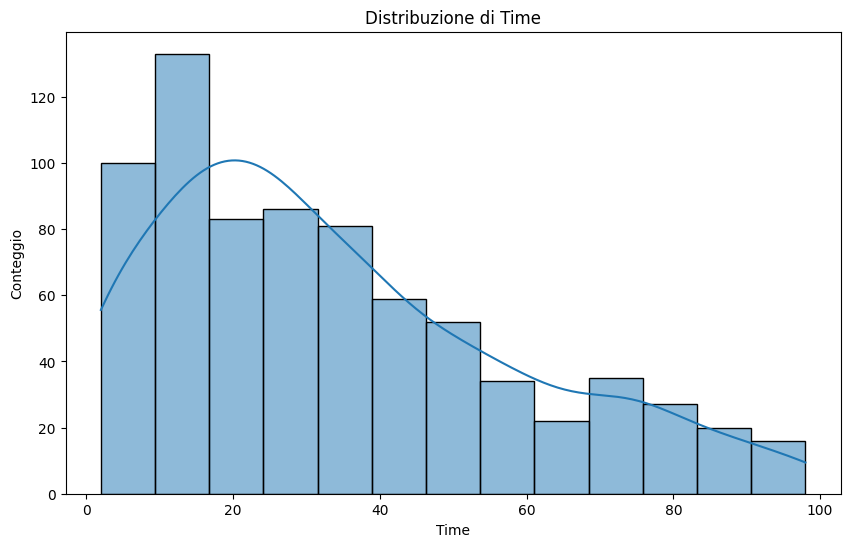


Legenda per l'interpretazione degli indici:
# Skewness = 0: Distribuzione perfettamente simmetrica.
# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).
# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).
# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).
# Kurtosis > 3: Code più pronunciate (leptocurtica).
# Kurtosis < 3: Code meno pronunciate (platicurtica).
# CV < 10%: Distribuzione molto bilanciata.
# CV > 50%: Distribuzione altamente sbilanciata.

Tabella riassuntiva degli indici per le feature numeriche:
               Gini   Kurtosis  Skewness      CV (%)
Frequency  0.478150  15.762216  3.204822  105.815299
Monetary   0.478150  15.762216  3.204822  105.815299
Recency    0.439091   9.320679  1.876690   85.097833
Time       0.395629  -0.252003  0.747947   71.058729


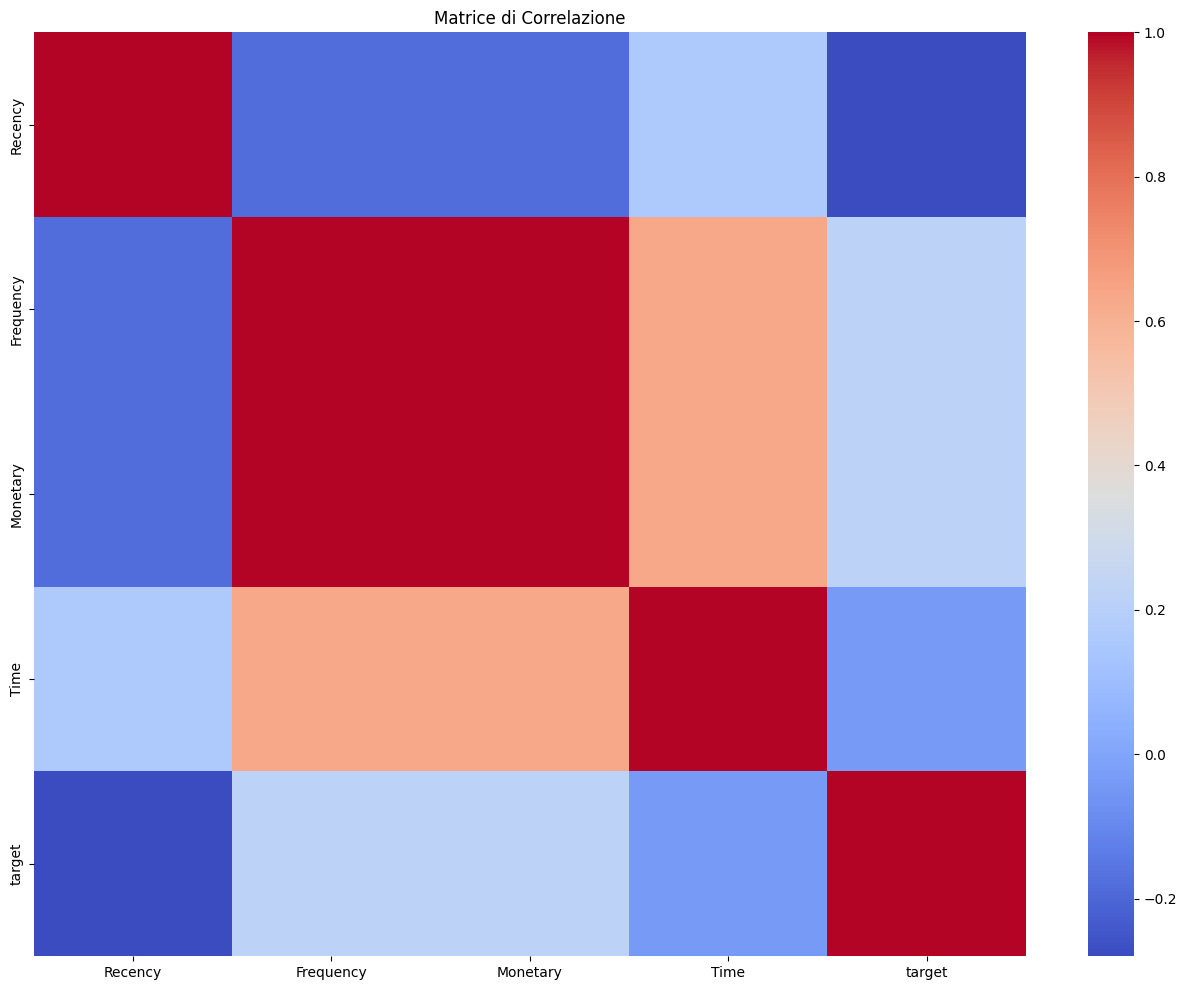

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

# Funzioni di analisi
def plot_numerical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.xlabel(column)
    plt.ylabel('Conteggio')
    plt.show()

def calculate_gini(array):
    array = np.sort(array)
    index = np.arange(1, len(array) + 1)
    n = len(array)
    if np.sum(array) == 0:
        return np.nan  # Evita divisioni per zero
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

def calculate_cv(array):
    mean = np.mean(array)
    if mean == 0:
        return np.nan  # Evita divisioni per zero
    return np.std(array) / mean * 100

# Caricamento del dataset
# Assuming 'X' è il DataFrame delle features e 'y' è il target
df = pd.DataFrame(X)
df['target'] = y  # Aggiunge la colonna target per l'analisi

# Calcolo degli indici per le variabili numeriche
numerical_columns = df.columns
summary_stats = {}

for col in numerical_columns:
    if col != 'target':  # Escludiamo la colonna target
        data = df[col].dropna().values
        if len(data) > 0:
            summary_stats[col] = {
                'Gini': calculate_gini(data),
                'Kurtosis': kurtosis(data, nan_policy='omit'),
                'Skewness': skew(data, nan_policy='omit'),
                'CV (%)': calculate_cv(data)
            }
            plot_numerical_distribution(df, col)

# Creazione della tabella riassuntiva
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df = summary_df.sort_values('Gini', ascending=False)

# Legenda per l'interpretazione
print("\nLegenda per l'interpretazione degli indici:")
print("# Skewness = 0: Distribuzione perfettamente simmetrica.")
print("# Skewness > 0: Sbilanciamento verso destra (coda lunga a destra).")
print("# Skewness < 0: Sbilanciamento verso sinistra (coda lunga a sinistra).")
print("# Kurtosis ≈ 3: Distribuzione normale (mesocurtica).")
print("# Kurtosis > 3: Code più pronunciate (leptocurtica).")
print("# Kurtosis < 3: Code meno pronunciate (platicurtica).")
print("# CV < 10%: Distribuzione molto bilanciata.")
print("# CV > 50%: Distribuzione altamente sbilanciata.")

print("\nTabella riassuntiva degli indici per le feature numeriche:")
print(summary_df)

# Matrice di correlazione
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()


In [55]:
# Converti y in un array unidimensionale
y = np.ravel(y)

# Standardizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Suddivisione del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

X= X_train
y= y_train
print(X)
print(y)

[[ 0.55541721 -0.77367514 -0.77367514 -0.83258377]
 [-0.92789873 -0.77367514 -0.77367514 -1.32518623]
 [ 0.80263654 -0.43093957 -0.43093957 -0.62733274]
 ...
 [-0.92789873  1.62547383  1.62547383  0.6041734 ]
 [ 1.66790417  1.62547383  1.62547383  0.93257504]
 [ 0.80263654 -0.25957179 -0.25957179 -0.46313192]]
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1
 0 0 0 1 0 0 

In [56]:
num_classes = len(np.unique(y))
print(num_classes)

2


In [57]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    num_classes = len(np.unique(y))
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

## Baseline Machine Learning Models: Classifiers with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [12]:
# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precision aggiunto
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification = []

# Random Forest
start_time_rf = time.time()
clf_rf = RandomForestClassifier(n_jobs=-1)
scores_rf = cross_validate(clf_rf, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Accuracy': scores_rf['test_accuracy'].mean(),
    'Recall': scores_rf['test_recall'].mean(),
    'Precision': scores_rf['test_precision'].mean(),
    'F1 Score': scores_rf['test_f1'].mean(),
    'Log Loss': scores_rf['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
clf_svm = SVC(probability=True)
scores_svm = cross_validate(clf_svm, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification.append({
    'Algorithm': 'SVM',
    'Accuracy': scores_svm['test_accuracy'].mean(),
    'Recall': scores_svm['test_recall'].mean(),
    'Precision': scores_svm['test_precision'].mean(),
    'F1 Score': scores_svm['test_f1'].mean(),
    'Log Loss': scores_svm['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
clf_knn = KNeighborsClassifier()
scores_knn = cross_validate(clf_knn, X, y, cv=3, scoring=scorers, verbose=3)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification.append({
    'Algorithm': 'KNN',
    'Accuracy': scores_knn['test_accuracy'].mean(),
    'Recall': scores_knn['test_recall'].mean(),
    'Precision': scores_knn['test_precision'].mean(),
    'F1 Score': scores_knn['test_f1'].mean(),
    'Log Loss': scores_knn['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
clf_ann = KerasClassifier(model=ANN, verbose=0)
scores_ann = cross_validate(clf_ann, X, y, cv=3, scoring=scorers)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification.append({
    'Algorithm': 'ANN',
    'Accuracy': scores_ann['test_accuracy'].mean(),
    'Recall': scores_ann['test_recall'].mean(),
    'Precision': scores_ann['test_precision'].mean(),
    'F1 Score': scores_ann['test_f1'].mean(),
    'Log Loss': scores_ann['test_log_loss'].mean(),
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione risultati
results_df_3_fold_classification = pd.DataFrame(results_classification)
print("\nResults for Classification Models (3-Fold Cross-Validation):")
print(results_df_3_fold_classification.to_string(index=False))

[CV] END  accuracy: (test=0.725) f1: (test=0.575) log_loss: (test=1.815) precision: (test=0.588) recall: (test=0.571) total time=   0.4s
[CV] END  accuracy: (test=0.760) f1: (test=0.646) log_loss: (test=0.771) precision: (test=0.661) recall: (test=0.637) total time=   0.4s
[CV] END  accuracy: (test=0.790) f1: (test=0.666) log_loss: (test=0.520) precision: (test=0.712) recall: (test=0.648) total time=   0.5s
[CV] END  accuracy: (test=0.754) f1: (test=0.430) log_loss: (test=0.534) precision: (test=0.382) recall: (test=0.492) total time=   0.1s
[CV] END  accuracy: (test=0.760) f1: (test=0.544) log_loss: (test=0.504) precision: (test=0.640) recall: (test=0.551) total time=   0.1s
[CV] END  accuracy: (test=0.772) f1: (test=0.567) log_loss: (test=0.515) precision: (test=0.685) recall: (test=0.568) total time=   0.1s
[CV] END  accuracy: (test=0.790) f1: (test=0.630) log_loss: (test=2.894) precision: (test=0.712) recall: (test=0.614) total time=   0.0s
[CV] END  accuracy: (test=0.766) f1: (tes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6438
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6039
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5915  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5867  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5585
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5561 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5637
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5389
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5076 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5136  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5105 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5222  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5106
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4972 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5396  
Epoc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6143  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5757 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5489 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5329 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5420 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5254 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5086 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4925 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5064 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5393 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4966 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5114 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5048 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5218 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4919 
Epo

## HPO Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [13]:
# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precision aggiunto
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification_grid_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [15, 20, 30, 50],
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
grid_rf = GridSearchCV(clf_rf, rf_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_grid_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': grid_rf.best_params_,
    'Accuracy': grid_rf.best_score_,
    'Recall': grid_rf.cv_results_['mean_test_recall'][grid_rf.best_index_],
    'Precision': grid_rf.cv_results_['mean_test_precision'][grid_rf.best_index_],
    'F1 Score': grid_rf.cv_results_['mean_test_f1'][grid_rf.best_index_],
    'Log Loss': grid_rf.cv_results_['mean_test_log_loss'][grid_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
grid_svm = GridSearchCV(clf_svm, svm_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_grid_search.append({
    'Algorithm': 'SVM',
    'Best Params': grid_svm.best_params_,
    'Accuracy': grid_svm.best_score_,
    'Recall': grid_svm.cv_results_['mean_test_recall'][grid_svm.best_index_],
    'Precision': grid_svm.cv_results_['mean_test_precision'][grid_svm.best_index_],
    'F1 Score': grid_svm.cv_results_['mean_test_f1'][grid_svm.best_index_],
    'Log Loss': grid_svm.cv_results_['mean_test_log_loss'][grid_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': [2, 3, 5, 10, 15, 20],
}
clf_knn = KNeighborsClassifier()
grid_knn = GridSearchCV(clf_knn, knn_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_grid_search.append({
    'Algorithm': 'KNN',
    'Best Params': grid_knn.best_params_,
    'Accuracy': grid_knn.best_score_,
    'Recall': grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_],
    'Precision': grid_knn.cv_results_['mean_test_precision'][grid_knn.best_index_],
    'F1 Score': grid_knn.cv_results_['mean_test_f1'][grid_knn.best_index_],
    'Log Loss': grid_knn.cv_results_['mean_test_log_loss'][grid_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'batch_size': [16, 32],
    'epochs': [20, 50],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh']
}

clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=16, patience=2, verbose=0)
grid_ann = GridSearchCV(clf_ann, ann_params, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
grid_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_grid_search.append({
    'Algorithm': 'ANN',
    'Best Params': grid_ann.best_params_,
    'Accuracy': grid_ann.best_score_,
    'Recall': grid_ann.cv_results_['mean_test_recall'][grid_ann.best_index_],
    'Precision': grid_ann.cv_results_['mean_test_precision'][grid_ann.best_index_],
    'F1 Score': grid_ann.cv_results_['mean_test_f1'][grid_ann.best_index_],
    'Log Loss': grid_ann.cv_results_['mean_test_log_loss'][grid_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione risultati
results_classification_df_grid_search = pd.DataFrame(results_classification_grid_search)
print("Results for Grid Search")
print(results_classification_df_grid_search.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8579  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7484 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6818 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6285 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6170 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5734 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5664 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5533 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5488 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5503 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5300 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5234 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5162 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5155 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5299 
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6668  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6505 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6298 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6212  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5836  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5674  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5667  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5593  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5484 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5556 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5572 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5344 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5333 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5169 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5226

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5888  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5652 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5356 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5281 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5144 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4901 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4843 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4918 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4895 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4566 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4540 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4657 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4880 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4770 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4981  
Ep

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6728  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6428 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5914 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5950 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5436 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5216 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5430 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5322 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5111 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5191 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4974  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4971 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4665 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5079 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4980 
Ep

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6653  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6367 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6042  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5862 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5922
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5912 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5866 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5555 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5727 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5492 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5617  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5196 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5177  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5498  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5259 


## HPO Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization.

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [25]:
# Definire i punteggi per log_loss con zero_division
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')
precision_scorer = make_scorer(precision_score, average='macro', zero_division=1)
recall_scorer = make_scorer(recall_score, average='macro')
f1_scorer = make_scorer(f1_score, average='macro')

# Scorers con precision aggiunto
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': recall_scorer,
    'precision': precision_scorer,
    'f1': f1_scorer,
    'log_loss': log_loss_scorer
}

results_classification_random_search = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': sp_randint(10, 100),
    'max_features': sp_randint(1, 64),
    'max_depth': sp_randint(5, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'criterion': ['gini', 'entropy']
}
n_iter_search_rf = 20  # Number of iterations
clf_rf = RandomForestClassifier(random_state=0)
Random_rf = RandomizedSearchCV(clf_rf, param_distributions=rf_params, n_iter=n_iter_search_rf, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_random_search.append({
    'Algorithm': 'Random Forest',
    'Best Params': Random_rf.best_params_,
    'Accuracy': Random_rf.best_score_,
    'Recall': Random_rf.cv_results_['mean_test_recall'][Random_rf.best_index_],
    'Precision': Random_rf.cv_results_['mean_test_precision'][Random_rf.best_index_],
    'F1 Score': Random_rf.cv_results_['mean_test_f1'][Random_rf.best_index_],
    'Log Loss': Random_rf.cv_results_['mean_test_log_loss'][Random_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': uniform(0, 50),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
n_iter_search_svm = 20
clf_svm = SVC(gamma='scale', probability=True)
Random_svm = RandomizedSearchCV(clf_svm, param_distributions=svm_params, n_iter=n_iter_search_svm, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_random_search.append({
    'Algorithm': 'SVM',
    'Best Params': Random_svm.best_params_,
    'Accuracy': Random_svm.best_score_,
    'Recall': Random_svm.cv_results_['mean_test_recall'][Random_svm.best_index_],
    'Precision': Random_svm.cv_results_['mean_test_precision'][Random_svm.best_index_],
    'F1 Score': Random_svm.cv_results_['mean_test_f1'][Random_svm.best_index_],
    'Log Loss': Random_svm.cv_results_['mean_test_log_loss'][Random_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': range(1, 20),
}
n_iter_search_knn = 10
clf_knn = KNeighborsClassifier()
Random_knn = RandomizedSearchCV(clf_knn, param_distributions=knn_params, n_iter=n_iter_search_knn, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_random_search.append({
    'Algorithm': 'KNN',
    'Best Params': Random_knn.best_params_,
    'Accuracy': Random_knn.best_score_,
    'Recall': Random_knn.cv_results_['mean_test_recall'][Random_knn.best_index_],
    'Precision': Random_knn.cv_results_['mean_test_precision'][Random_knn.best_index_],
    'F1 Score': Random_knn.cv_results_['mean_test_f1'][Random_knn.best_index_],
    'Log Loss': Random_knn.cv_results_['mean_test_log_loss'][Random_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': sp_randint(10, 100),
    'epochs': [20, 50],
    'patience': sp_randint(3, 20)
}
n_iter_search_ann = 10
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
Random_ann = RandomizedSearchCV(clf_ann, param_distributions=ann_params, n_iter=n_iter_search_ann, cv=3, scoring=scorers, refit='accuracy', return_train_score=True)
Random_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_random_search.append({
    'Algorithm': 'ANN',
    'Best Params': Random_ann.best_params_,
    'Accuracy': Random_ann.best_score_,
    'Recall': Random_ann.cv_results_['mean_test_recall'][Random_ann.best_index_],
    'Precision': Random_ann.cv_results_['mean_test_precision'][Random_ann.best_index_],
    'F1 Score': Random_ann.cv_results_['mean_test_f1'][Random_ann.best_index_],
    'Log Loss': Random_ann.cv_results_['mean_test_log_loss'][Random_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione risultati
results_classification_df_random_search = pd.DataFrame(results_classification_random_search)
print("Results for Random Search")
print(results_classification_df_random_search.to_string(index=False))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6665  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6220 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6012 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5932 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5479 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5580 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5046 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5384 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5155 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5033 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4884 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5218 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4844 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4860  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4763 
Ep

## HPO Algorithm 3: BO-GP
Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages:**
* Fast convergence speed for continuous HPs.  

**Disadvantages:**  
* Poor capacity for parallelization.
* Not efficient with conditional HPs.

### Using skopt.BayesSearchCV

In [26]:
# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precision aggiunto
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification_bo = []

# Random Forest
start_time_rf = time.time()
rf_params = {
    'n_estimators': Integer(10, 100),
    'max_features': Integer(1, 64),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 11),
    'min_samples_leaf': Integer(1, 11),
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
with parallel_backend('threading'):
    Bayes_rf = BayesSearchCV(clf_rf, rf_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
results_classification_bo.append({
    'Algorithm': 'Random Forest',
    'Best Params': Bayes_rf.best_params_,
    'Accuracy': Bayes_rf.best_score_,
    'Recall': Bayes_rf.cv_results_['mean_test_recall'][Bayes_rf.best_index_],
    'Precision': Bayes_rf.cv_results_['mean_test_precision'][Bayes_rf.best_index_],
    'F1 Score': Bayes_rf.cv_results_['mean_test_f1'][Bayes_rf.best_index_],
    'Log Loss': Bayes_rf.cv_results_['mean_test_log_loss'][Bayes_rf.best_index_],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
svm_params = {
    'C': Real(0.01, 50),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
with parallel_backend('threading'):
    Bayes_svm = BayesSearchCV(clf_svm, svm_params, cv=3, n_iter=20, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
results_classification_bo.append({
    'Algorithm': 'SVM',
    'Best Params': Bayes_svm.best_params_,
    'Accuracy': Bayes_svm.best_score_,
    'Recall': Bayes_svm.cv_results_['mean_test_recall'][Bayes_svm.best_index_],
    'Precision': Bayes_svm.cv_results_['mean_test_precision'][Bayes_svm.best_index_],
    'F1 Score': Bayes_svm.cv_results_['mean_test_f1'][Bayes_svm.best_index_],
    'Log Loss': Bayes_svm.cv_results_['mean_test_log_loss'][Bayes_svm.best_index_],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
knn_params = {
    'n_neighbors': Integer(1, 20),
}
clf_knn = KNeighborsClassifier()
with parallel_backend('threading'):
    Bayes_knn = BayesSearchCV(clf_knn, knn_params, cv=3, n_iter=10, n_jobs=-1, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
results_classification_bo.append({
    'Algorithm': 'KNN',
    'Best Params': Bayes_knn.best_params_,
    'Accuracy': Bayes_knn.best_score_,
    'Recall': Bayes_knn.cv_results_['mean_test_recall'][Bayes_knn.best_index_],
    'Precision': Bayes_knn.cv_results_['mean_test_precision'][Bayes_knn.best_index_],
    'F1 Score': Bayes_knn.cv_results_['mean_test_f1'][Bayes_knn.best_index_],
    'Log Loss': Bayes_knn.cv_results_['mean_test_log_loss'][Bayes_knn.best_index_],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
ann_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'neurons': Integer(10, 100),
    'epochs': Categorical([20, 50]),
    'patience': Integer(3, 20)
}
clf_ann = KerasClassifier(model=ANN, activation='relu', neurons=10, patience=6, verbose=0)
with parallel_backend('threading'):
    Bayes_ann = BayesSearchCV(clf_ann, ann_params, cv=3, n_iter=10, scoring=scorers, refit='accuracy', return_train_score=True)
    Bayes_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
results_classification_bo.append({
    'Algorithm': 'ANN',
    'Best Params': Bayes_ann.best_params_,
    'Accuracy': Bayes_ann.best_score_,
    'Recall': Bayes_ann.cv_results_['mean_test_recall'][Bayes_ann.best_index_],
    'Precision': Bayes_ann.cv_results_['mean_test_precision'][Bayes_ann.best_index_],
    'F1 Score': Bayes_ann.cv_results_['mean_test_f1'][Bayes_ann.best_index_],
    'Log Loss': Bayes_ann.cv_results_['mean_test_log_loss'][Bayes_ann.best_index_],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione DataFrame e visualizzazione risultati
results_classification_df_bo = pd.DataFrame(results_classification_bo)
print("Results for Bayesian Optimization")
print(results_classification_df_bo.to_string(index=False))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7910  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6973 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6368 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6078 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5745 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5701 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5532  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5450  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5629  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5120 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5453 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5298 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5103  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5032  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5211

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7034  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6472 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6271 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6070 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5973 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5614 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5630 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5462 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5390 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5338 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5281 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5253  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5205 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5078 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5059 
Epoch 16/20
1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8697  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7702 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7006 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6423 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6092 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5961 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5769 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5393 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5576 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5353 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5258 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5138 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5064 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5320 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5177  
Ep

### Using skopt.gp_minimize

In [27]:
# Definire i punteggi per log_loss
log_loss_scorer = make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')

# Scorers con precisione inclusa
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'log_loss': log_loss_scorer
}

results_classification_skopt_gp_minimize = []

def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['accuracy']))
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['recall']))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['precision']))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['f1']))
    log_loss_val = -np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['log_loss']))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + gamma * precision + delta * f1 + log_loss_val)

# Random Forest
start_time_rf = time.time()
reg_rf = RandomForestClassifier()

space_rf = [
    Integer(10, 100, name='n_estimators'),
    Integer(5, 50, name='max_depth'),
    Integer(1, 64, name='max_features'),
    Integer(2, 11, name='min_samples_split'),
    Integer(1, 11, name='min_samples_leaf'),
    Categorical(['gini', 'entropy'], name='criterion'),
]

@use_named_args(space_rf)
def objective_rf(**params):
    reg_rf.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_rf, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_rf = gp_minimize(objective_rf, space_rf, n_calls=20, random_state=0)

elapsed_time_rf = time.time() - start_time_rf
# Rebuild the model with the best parameters
best_rf = RandomForestClassifier(**dict(zip([dim.name for dim in space_rf], res_gp_rf.x)))
best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'Random Forest',
    'Best Params': dict(zip([dim.name for dim in space_rf], res_gp_rf.x)),
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': -best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
reg_svm = SVC(gamma='scale', probability=True)

space_svm = [
    Real(0.01, 50, name='C'),
    Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'),
]

@use_named_args(space_svm)
def objective_svm(**params):
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_svm = gp_minimize(objective_svm, space_svm, n_calls=20, random_state=0)

elapsed_time_svm = time.time() - start_time_svm
# Rebuild the model with the best parameters
best_svm = SVC(**dict(zip([dim.name for dim in space_svm], res_gp_svm.x)), probability=True)
best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'SVM',
    'Best Params': dict(zip([dim.name for dim in space_svm], res_gp_svm.x)),
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': -best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
reg_knn = KNeighborsClassifier()

space_knn = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space_knn)
def objective_knn(**params):
    reg_knn.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_knn, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_knn = gp_minimize(objective_knn, space_knn, n_calls=10, random_state=0)

elapsed_time_knn = time.time() - start_time_knn
# Rebuild the model with the best parameters
best_knn = KNeighborsClassifier(**dict(zip([dim.name for dim in space_knn], res_gp_knn.x)))
best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'KNN',
    'Best Params': dict(zip([dim.name for dim in space_knn], res_gp_knn.x)),
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': -best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
space_ann = [
    Categorical(['lbfgs', 'adam', 'sgd'], name='optimizer'),
    Categorical(['relu', 'tanh'], name='activation'),
    Integer(10, 100, name='neurons'),
    Integer(3, 20, name='patience'),
    Integer(16, 64, name='batch_size'),
    Categorical([20, 50], name='epochs'),
]

@use_named_args(space_ann)
def objective_ann(optimizer, activation, neurons, patience, batch_size, epochs):
    model = MLPClassifier(
        hidden_layer_sizes=(neurons,),
        activation=activation,
        solver=optimizer,
        batch_size=batch_size,
        max_iter=epochs,
        early_stopping=True,
        n_iter_no_change=patience,
        random_state=42
    )
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(model, X, y)
    return composite_score(accuracy, recall, precision, f1, log_loss_val)

with parallel_backend('threading'):
    res_gp_ann = gp_minimize(objective_ann, space_ann, n_calls=20, random_state=42, verbose=0)

elapsed_time_ann = time.time() - start_time_ann
# Rebuild the model with the best parameters
best_ann = MLPClassifier(
    hidden_layer_sizes=(res_gp_ann.x[2],),
    activation=res_gp_ann.x[1],
    solver=res_gp_ann.x[0],
    batch_size=res_gp_ann.x[4],
    max_iter=res_gp_ann.x[5],
    early_stopping=True,
    n_iter_no_change=res_gp_ann.x[3],
    random_state=42
)
best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann, X, y)
results_classification_skopt_gp_minimize.append({
    'Algorithm': 'ANN',
    'Best Params': dict(zip([dim.name for dim in space_ann], res_gp_ann.x)),
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': -best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_skopt_gp_minimize = pd.DataFrame(results_classification_skopt_gp_minimize)
print("Results for skopt.gp_minimize")
print(results_classification_df_skopt_gp_minimize.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: P

Results for skopt.gp_minimize
    Algorithm                                                                                                                       Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 71, 'max_depth': 25, 'max_features': 27, 'min_samples_split': 6, 'min_samples_leaf': 11, 'criterion': 'entropy'}  0.790419 0.621910   0.697067  0.651128  0.498074         47.933362
          SVM                                                                                        {'C': 18.018858893480306, 'kernel': 'rbf'}  0.786427 0.610837   0.712968  0.623947  0.503245         34.365382
          KNN                                                                                                               {'n_neighbors': 17}  0.784431 0.601196   0.708523  0.613956  0.592475          4.029978
          ANN                        {'optimizer': 'lbfgs', 'activation': 'relu', 'neurons': 10, 'patience': 4, 'batch_siz

## HPO Algorithm 4: BO-TPE
Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

**Advantages:**
* Efficient with all types of HPs.
* Keep conditional dependencies.

**Disadvantages:**  
* Poor capacity for parallelization.

In [61]:
results_classification_bo_tpe = []
def evaluate_metrics(model, X, y):
    """Evaluate multiple metrics and return them."""
    accuracy = cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['accuracy']).mean()
    recall = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['recall']))
    precision = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['precision']))
    f1 = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['f1']))
    log_loss_val = np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1, scoring=scorers['log_loss']))
    return accuracy, recall, precision, f1, log_loss_val

def composite_score(accuracy, recall, precision, f1, log_loss_val, alpha=1.0, beta=1.0, gamma=1.0, delta=1.0, epsilon=1.0):
    """Calculate a composite score from multiple metrics."""
    return - (alpha * accuracy + beta * recall + epsilon * precision + gamma * f1 + delta * log_loss_val)

# Objective function for Random Forest
def objective_rf(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': str(params['criterion'])
    }
    clf = RandomForestClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

# Define search space for Random Forest
space_rf = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    'max_features': hp.quniform('max_features', 1, 64, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

start_time = time.time()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=20)
elapsed_time_rf = round(time.time() - start_time, 2)

best_params_rf = space_eval(space_rf, best_rf)
best_rf_model = RandomForestClassifier(
    n_estimators=int(best_params_rf['n_estimators']),
    max_depth=int(best_params_rf['max_depth']),
    max_features=int(best_params_rf['max_features']),
    min_samples_split=int(best_params_rf['min_samples_split']),
    min_samples_leaf=int(best_params_rf['min_samples_leaf']),
    criterion=str(best_params_rf['criterion'])
)

best_accuracy_rf, best_recall_rf, best_precision_rf, best_f1_rf, best_log_loss_rf = evaluate_metrics(best_rf_model, X, y)

# Random Forest results
results_classification_bo_tpe.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': best_accuracy_rf,
    'Recall': best_recall_rf,
    'Precision': best_precision_rf,
    'F1 Score': best_f1_rf,
    'Log Loss': -best_log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})
# SVM
start_time_svm = time.time()
reg_svm = SVC(gamma='scale', probability=True)  # Ensure probability=True for log_loss calculation

space_svm = [
    Real(0.01, 50, name='C'),
    Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'),
]

# Objective function for SVM
@use_named_args(space_svm)
def objective_svm(**params):
    reg_svm.set_params(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(reg_svm, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return score

with parallel_backend('threading'):
    res_gp_svm = gp_minimize(objective_svm, space_svm, n_calls=20, random_state=0)

elapsed_time_svm = time.time() - start_time_svm

# Re-evaluate metrics on the best model
best_params_svm = dict(zip([dim.name for dim in space_svm], res_gp_svm.x))
best_svm_model = SVC(**best_params_svm, gamma='scale', probability=True)

best_accuracy_svm, best_recall_svm, best_precision_svm, best_f1_svm, best_log_loss_svm = evaluate_metrics(best_svm_model, X, y)

# SVM results
results_classification_bo_tpe.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': best_accuracy_svm,
    'Recall': best_recall_svm,
    'Precision': best_precision_svm,
    'F1 Score': best_f1_svm,
    'Log Loss': -best_log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# Define space for KNN
space_knn = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1)
}

# Objective function for KNN
def objective_knn(params):
    params = {
        'n_neighbors': int(params['n_neighbors'])
    }
    clf = KNeighborsClassifier(**params)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

start_time = time.time()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=20)
elapsed_time_knn = round(time.time() - start_time, 2)

best_params_knn = space_eval(space_knn, best_knn)
best_knn_model = KNeighborsClassifier(
    n_neighbors=int(best_params_knn['n_neighbors'])
)

best_accuracy_knn, best_recall_knn, best_precision_knn, best_f1_knn, best_log_loss_knn = evaluate_metrics(best_knn_model, X, y)

# KNN results
results_classification_bo_tpe.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': best_accuracy_knn,
    'Recall': best_recall_knn,
    'Precision': best_precision_knn,
    'F1 Score': best_f1_knn,
    'Log Loss': -best_log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# Define space for ANN
space_ann = {
    "optimizer": hp.choice('optimizer', ['adam', 'rmsprop']),
    "activation": hp.choice('activation', ['relu', 'tanh']),
    "loss": hp.choice('loss', ['sparse_categorical_crossentropy']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

# Objective function for ANN
def objective_ann(params):
    params = {
        "optimizer": str(params['optimizer']),
        "activation": str(params['activation']),
        'batch_size': int(params['batch_size']),
        'neurons': int(params['neurons']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'loss': str(params['loss'])
    }
    clf = KerasClassifier(model=ANN, **params, verbose=0)
    accuracy, recall, precision, f1, log_loss_val = evaluate_metrics(clf, X, y)
    score = composite_score(accuracy, recall, precision, f1, log_loss_val)
    return {'loss': score, 'status': STATUS_OK}

start_time = time.time()
best_ann = fmin(fn=objective_ann, space=space_ann, algo=tpe.suggest, max_evals=10)
elapsed_time_ann = round(time.time() - start_time, 2)

best_params_ann = space_eval(space_ann, best_ann)
best_ann_model = KerasClassifier(model=ANN, **{
    "optimizer": str(best_params_ann['optimizer']),
    "activation": str(best_params_ann['activation']),
    'batch_size': int(best_params_ann['batch_size']),
    'neurons': int(best_params_ann['neurons']),
    'epochs': int(best_params_ann['epochs']),
    'patience': int(best_params_ann['patience']),
    'loss': str(best_params_ann['loss'])
}, verbose=0)

best_accuracy_ann, best_recall_ann, best_precision_ann, best_f1_ann, best_log_loss_ann = evaluate_metrics(best_ann_model, X, y)

# ANN results
results_classification_bo_tpe.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': best_accuracy_ann,
    'Recall': best_recall_ann,
    'Precision': best_precision_ann,
    'F1 Score': best_f1_ann,
    'Log Loss': -best_log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti l'array in un DataFrame
results_classification_df_bo_tpe = pd.DataFrame(results_classification_bo_tpe)
print("Results for Bayesian Optimization with TPE")
print(results_classification_df_bo_tpe.to_string(index=False))

100%|██████████| 20/20 [00:35<00:00,  1.76s/trial, best loss: 5.533426354206696]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

 20%|██        | 2/10 [01:40<06:35, 49.41s/trial, best loss: 5.613474123692006]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



100%|██████████| 10/10 [09:08<00:00, 54.84s/trial, best loss: 5.563725992125408]
Results for Bayesian Optimization with TPE
    Algorithm                                                                                                                                                     Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                     {'criterion': 'entropy', 'max_depth': 48.0, 'max_features': 12.0, 'min_samples_leaf': 11.0, 'min_samples_split': 3.0, 'n_estimators': 31.0}  0.772455 0.336111   0.502517  0.427368  7.626003         35.160000
          SVM                                                                                                                      {'C': 16.876434059259253, 'kernel': 'rbf'}  0.786427 0.276709   0.618103  0.377017  7.697946         46.996566
          KNN                                                                                                                                         

## HPO Algorithm 5: PSO
Partical swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization.

**Disadvantages:**  
* Require proper initialization.

In [63]:
results_classification_pso = []
data = X
labels = y.tolist()

# Definizione degli scorer
scorers = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'log_loss': make_scorer(log_loss, labels=np.unique(y), response_method='predict_proba')
}

# Random Forest
search_rf = {
    'n_estimators': [10, 100],
    'max_features': [1, 64],
    'max_depth': [5, 50],
    "min_samples_split": [2, 11],
    "min_samples_leaf": [1, 11],
    "criterion": [0, 1]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_rf(x_train, y_train, x_test, y_test, n_estimators=None, max_features=None, max_depth=None, min_samples_split=None, min_samples_leaf=None, criterion=None):
    cri = 'gini' if criterion < 0.5 else 'entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_rf = time.time()
optimal_configuration_rf, info_rf, _ = optunity.maximize(performance_rf, solver_name='particle swarm', num_evals=20, **search_rf)
elapsed_time_rf = round(time.time() - start_time_rf, 2)
accuracy_rf = info_rf.optimum

# Get all metrics for RF
cri = 'gini' if optimal_configuration_rf['criterion'] < 0.5 else 'entropy'
rf_model = RandomForestClassifier(n_estimators=int(optimal_configuration_rf['n_estimators']),
                                  max_features=int(optimal_configuration_rf['max_features']),
                                  max_depth=int(optimal_configuration_rf['max_depth']),
                                  min_samples_split=int(optimal_configuration_rf['min_samples_split']),
                                  min_samples_leaf=int(optimal_configuration_rf['min_samples_leaf']),
                                  criterion=cri)
rf_scores = cross_validate(rf_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'Random Forest',
    'Best Params': optimal_configuration_rf,
    'Accuracy': np.mean(rf_scores['test_accuracy']),
    'Recall': np.mean(rf_scores['test_recall']),
    'Precision': np.mean(rf_scores['test_precision']),
    'F1 Score': np.mean(rf_scores['test_f1']),
    'Log Loss': np.mean(rf_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
search_svm = {
    'C': (0, 50),
    'kernel': [0, 4]
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_svm(x_train, y_train, x_test, y_test, C=None, kernel=None):
    ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(kernel)]
    model = SVC(C=float(C), kernel=ke, probability=True)
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_svm = time.time()
optimal_configuration_svm, info_svm, _ = optunity.maximize(performance_svm, solver_name='particle swarm', num_evals=20, **search_svm)
elapsed_time_svm = round(time.time() - start_time_svm, 2)
accuracy_svm = info_svm.optimum

# Get all metrics for SVM
ke = ['linear', 'poly', 'rbf', 'sigmoid'][int(optimal_configuration_svm['kernel'])]
svm_model = SVC(C=float(optimal_configuration_svm['C']), kernel=ke, probability=True)
svm_scores = cross_validate(svm_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'SVM',
    'Best Params': optimal_configuration_svm,
    'Accuracy': np.mean(svm_scores['test_accuracy']),
    'Recall': np.mean(svm_scores['test_recall']),
    'Precision': np.mean(svm_scores['test_precision']),
    'F1 Score': np.mean(svm_scores['test_f1']),
    'Log Loss': np.mean(svm_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
search_knn = {
    'n_neighbors': [1, 20],
}

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_knn(x_train, y_train, x_test, y_test, n_neighbors=None):
    model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    scores = cross_validate(model, X, y, cv=3, n_jobs=-1, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_knn = time.time()
optimal_configuration_knn, info_knn, _ = optunity.maximize(performance_knn, solver_name='particle swarm', num_evals=10, **search_knn)
elapsed_time_knn = round(time.time() - start_time_knn, 2)
accuracy_knn = info_knn.optimum

# Get all metrics for KNN
knn_model = KNeighborsClassifier(n_neighbors=int(optimal_configuration_knn['n_neighbors']))
knn_scores = cross_validate(knn_model, X, y, cv=3, n_jobs=-1, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'KNN',
    'Best Params': optimal_configuration_knn,
    'Accuracy': np.mean(knn_scores['test_accuracy']),
    'Recall': np.mean(knn_scores['test_recall']),
    'Precision': np.mean(knn_scores['test_precision']),
    'F1 Score': np.mean(knn_scores['test_f1']),
    'Log Loss': np.mean(knn_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
search_ann = {
    'optimizer': [0, 3],
    'activation': [0, 2],
    'batch_size': [0, 2],
    'neurons': [10, 100],
    'epochs': [20, 50],
    'patience': [3, 20],
}

def ANN(optimizer='adam', activation='relu', batch_size=32, neurons=50, epochs=100, patience=10):
    model = MLPClassifier(hidden_layer_sizes=(neurons,),
                          activation=activation,
                          solver=optimizer,
                          batch_size=batch_size,
                          max_iter=epochs,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change=patience)
    return model

@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance_ann(x_train, y_train, x_test, y_test, optimizer=None, activation=None, batch_size=None, neurons=None, epochs=None, patience=None):
    if optimizer < 1:
        op = 'adam'
    elif optimizer < 2:
        op = 'sgd'
    else:
        op = 'lbfgs'
    if activation < 1:
        ac = 'relu'
    else:
        ac = 'tanh'
    if batch_size < 1:
        ba = 16
    else:
        ba = 32
    model = ANN(optimizer=op, activation=ac, batch_size=ba, neurons=int(neurons), epochs=int(epochs), patience=int(patience))
    scores = cross_validate(model, X, y, cv=3, scoring=scorers)
    return np.mean(scores['test_accuracy'])

start_time_ann = time.time()
optimal_configuration_ann, info_ann, _ = optunity.maximize(performance_ann, solver_name='particle swarm', num_evals=20, **search_ann)
elapsed_time_ann = round(time.time() - start_time_ann, 2)
accuracy_ann = info_ann.optimum

# Get all metrics for ANN
if optimal_configuration_ann['optimizer'] < 1:
    op = 'adam'
elif optimal_configuration_ann['optimizer'] < 2:
    op = 'sgd'
else:
    op = 'lbfgs'
ac = 'relu' if optimal_configuration_ann['activation'] < 1 else 'tanh'
ba = 16 if optimal_configuration_ann['batch_size'] < 1 else 32

ann_model = ANN(optimizer=op,
                activation=ac,
                batch_size=ba,
                neurons=int(optimal_configuration_ann['neurons']),
                epochs=int(optimal_configuration_ann['epochs']),
                patience=int(optimal_configuration_ann['patience']))
ann_scores = cross_validate(ann_model, X, y, cv=3, scoring=scorers)

results_classification_pso.append({
    'Algorithm': 'ANN',
    'Best Params': optimal_configuration_ann,
    'Accuracy': np.mean(ann_scores['test_accuracy']),
    'Recall': np.mean(ann_scores['test_recall']),
    'Precision': np.mean(ann_scores['test_precision']),
    'F1 Score': np.mean(ann_scores['test_f1']),
    'Log Loss': np.mean(ann_scores['test_log_loss']),
    'Time Elapsed (s)': elapsed_time_ann
})

results_classification_df_pso = pd.DataFrame(results_classification_pso)
print("Results for Particle Swarm Optimization")
print(results_classification_df_pso.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Results for Particle Swarm Optimization
    Algorithm                                                                                                                                                                                    Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest {'n_estimators': 40.6298828125, 'max_features': 3.36865234375, 'max_depth': 35.21240234375, 'min_samples_split': 7.33935546875, 'min_samples_leaf': 10.1552734375, 'criterion': 0.24658203125}  0.778443 0.778443   0.752038  0.752594  0.495598             15.98
          SVM                                                                                                                                                    {'C': 20.2587890625, 'kernel': 2.628515625}  0.786427 0.786427   0.762655  0.753709  0.501094             32.76
          KNN                                                                                                                                

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Using DEAP

### Using TPOT

In [64]:
results_classification = []

# Definizione degli scorer
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'f1': make_scorer(f1_score, average='weighted')
}

def safe_log_loss(y_true, y_pred_proba):
    try:
        return log_loss(y_true, y_pred_proba)
    except Exception as e:
        # Se il modello non ha predict_proba o si verifica un altro errore, restituisci NaN
        return np.nan

scorers['log_loss'] = make_scorer(safe_log_loss, needs_proba=True, greater_is_better=False)

# Funzione per calcolare le metriche in modo sicuro
def safe_cross_validate(estimator, X, y):
    try:
        if hasattr(estimator, 'predict_proba'):
            estimator.predict_proba
        scores = cross_validate(estimator, X, y, cv=3, scoring=scorers)
        return {
            'accuracy': np.mean(scores['test_accuracy']),
            'recall': np.mean(scores['test_recall']),
            'precision': np.mean(scores['test_precision']),
            'f1': np.mean(scores['test_f1']),
            'log_loss': -np.mean(scores['test_log_loss']) if not np.isnan(scores['test_log_loss']).all() else 'N/A'
        }
    except Exception as e:
        print(f"Error in cross-validation: {e}")
        return {
            'accuracy': estimator.score(X, y),
            'recall': 'N/A',
            'precision': 'N/A',
            'f1': 'N/A',
            'log_loss': 'N/A'
        }

# Random Forest
parameters_rf = {
    'n_estimators': range(20, 200),
    'max_features': range(1, 64),
    'max_depth': range(10, 100),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}

start_time_rf = time.time()
ga2_rf = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                        verbosity=1, early_stop=5,
                        config_dict={'sklearn.ensemble.RandomForestClassifier': parameters_rf},
                        cv=3, scoring='accuracy')
ga2_rf.fit(X, y)
elapsed_time_rf = round(time.time() - start_time_rf, 2)

# Calcolo di tutte le metriche per Random Forest
rf_scores = safe_cross_validate(ga2_rf.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': ga2_rf.fitted_pipeline_,
    'Accuracy': rf_scores['accuracy'],
    'Recall': rf_scores['recall'],
    'Precision': rf_scores['precision'],
    'F1 Score': rf_scores['f1'],
    'Log Loss': rf_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
parameters_svm = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'probability': [True]
}

start_time_svm = time.time()
ga2_svm = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.svm.SVC': parameters_svm},
                         cv=3, scoring='accuracy')
ga2_svm.fit(X, y)
elapsed_time_svm = round(time.time() - start_time_svm, 2)

# Calcolo di tutte le metriche per SVM
svm_scores = safe_cross_validate(ga2_svm.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': ga2_svm.fitted_pipeline_,
    'Accuracy': svm_scores['accuracy'],
    'Recall': svm_scores['recall'],
    'Precision': svm_scores['precision'],
    'F1 Score': svm_scores['f1'],
    'Log Loss': svm_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
parameters_knn = {
    'n_neighbors': range(1, 20),
}

start_time_knn = time.time()
ga2_knn = TPOTClassifier(generations=3, population_size=10, offspring_size=5,
                         verbosity=1, early_stop=5,
                         config_dict={'sklearn.neighbors.KNeighborsClassifier': parameters_knn},
                         cv=3, scoring='accuracy')
ga2_knn.fit(X, y)
elapsed_time_knn = round(time.time() - start_time_knn, 2)

# Calcolo di tutte le metriche per KNN
knn_scores = safe_cross_validate(ga2_knn.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': ga2_knn.fitted_pipeline_,
    'Accuracy': knn_scores['accuracy'],
    'Recall': knn_scores['recall'],
    'Precision': knn_scores['precision'],
    'F1 Score': knn_scores['f1'],
    'Log Loss': knn_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
nn_parameters = {
    'sklearn.neural_network.MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
    }
}

tpot_ann = TPOTClassifier(
    generations=3,
    population_size=10,
    offspring_size=5,
    verbosity=1,
    early_stop=5,
    config_dict=nn_parameters,
    cv=3,
    scoring='accuracy'
)

start_time_ann = time.time()
tpot_ann.fit(X, y)
elapsed_time_ann = round(time.time() - start_time_ann, 2)

# Calcolo di tutte le metriche per ANN
ann_scores = safe_cross_validate(tpot_ann.fitted_pipeline_, X, y)

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': tpot_ann.fitted_pipeline_,
    'Accuracy': ann_scores['accuracy'],
    'Recall': ann_scores['recall'],
    'Precision': ann_scores['precision'],
    'F1 Score': ann_scores['f1'],
    'Log Loss': ann_scores['log_loss'],
    'Time Elapsed (s)': elapsed_time_ann
})

# Creazione del DataFrame con i risultati
results_classification_df_tpot = pd.DataFrame(results_classification)
print("Results for TPOT")
print(results_classification_df_tpot.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=51, max_features=36, min_samples_leaf=10, min_samples_split=8, n_estimators=58)
Best pipeline: SVC(input_matrix, C=15.888764602729772, kernel=rbf, probability=True)
Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=13)
Best pipeline: MLPClassifier(input_matrix, activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Results for TPOT
    Algorithm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [65]:
import pandas as pd

# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_3_fold_classification, '/content/results_3_fold_classification.csv'),
    (results_classification_df_grid_search, '/content/results_classification_grid_search.csv'),
    (results_classification_df_random_search, '/content/results_classification_random_search.csv'),
    (results_classification_df_bo, '/content/results_classification_bo.csv'),
    (results_classification_df_skopt_gp_minimize, '/content/results_classification_skopt_gp_minimize.csv'),
    (results_classification_df_bo_tpe, '/content/results_classification_bo_tpe.csv'),
    (results_classification_df_pso, '/content/results_classification_pso.csv'),
    (results_classification_df_tpot, '/content/results_classification_tpot.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

## HPO Algorithm 6: Hyperband
Generate small-sized subsets and allocate budgets to each hyper-parameter combination based on its performance

**Advantages:**
* Enable parallelization.  

**Disadvantages:**  
* Not efficient with conditional HPs.
* Require subsets with small budgets to be representative.

In [66]:
import os

!pip uninstall scikit-learn -y -q

def install_packages(packages):
    for package in packages:
        !pip install {package}

packages_to_install = [
    "pdfpages",
    "reportlab",
    "hpbandster",
    "hpbandster-sklearn",
    "tabulate",
    "ucimlrepo",
    "optuna-integration",
    "git+https://github.com/optuna/optuna.git"
]

# Rimuovi scikit-learn in modo silenzioso

packages_to_install.append("scikit-learn==1.0.2")

install_packages(packages_to_install)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 11.8 MB/s eta 0:00:00
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3380 sha256=f4ab326dc98e74a5e468d30d2f4313391cef5fe6a51e631c0692ab3fdfbefe8c
  Stored in directory: /root/.cache/pip/wheels/01/2e/c3/6a63cbb2e0b3060807943b6a02b22a8a740ae932ac6525c6d7
Successfully built pdfpages
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for hpbandster: filename=hpbandster-0.7

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import tensorflow as tf
import time
import optunity
import optunity.metrics
import warnings
import urllib.request
import arff
import os
import torch
import torchvision
import torchvision.transforms as transforms
import optuna
from random import randint, randrange as sp_randrange
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, log_loss, mean_absolute_error, make_scorer, precision_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, SVR, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils.validation import check_is_fitted
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from skopt import Optimizer, BayesSearchCV, gp_minimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from hpbandster_sklearn import HpBandSterSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from optuna.integration import KerasPruningCallback
from tabulate import tabulate
from colorama import Fore, Style
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
from optuna.pruners import HyperbandPruner
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, log_loss
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical


2024-09-17 13:50:03.955497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-17 13:50:04.014650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-17 13:50:04.031989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-17 13:50:04.069376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-17 13:50:07.185616: W tensorflow/compiler/tf2

In [2]:
# fetch dataset
blood_transfusion_service_center = fetch_ucirepo(id=176)

# data (as pandas dataframes)
X = blood_transfusion_service_center.data.features
y = blood_transfusion_service_center.data.targets

# metadata
print(blood_transfusion_service_center.metadata)

# variable information
print(blood_transfusion_service_center.variables)

print(X)
print(y)

# Converti y in un array unidimensionale
y = np.ravel(y)

# Standardizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Suddivisione del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

X= X_train
y= y_train
print(X)
print(y)

num_classes = len(np.unique(y))
print(num_classes)


{'uci_id': 176, 'name': 'Blood Transfusion Service Center', 'repository_url': 'https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center', 'data_url': 'https://archive.ics.uci.edu/static/public/176/data.csv', 'abstract': 'Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem. ', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 748, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Donated_Blood'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5GS39', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Knowledge discovery on RFM model using Bernoulli sequence', 'authors': 'I. Yeh, K. Yang, Tao-Ming Ting', 'published_in': 'Expert systems with applications', 'year': 2009, 'url': 'https://www.semantics

In [3]:
#ANN
def ANN(optimizer='sgd', neurons=32, batch_size=32, epochs=20, activation='relu', patience=3, loss='sparse_categorical_crossentropy'):
    num_classes = len(np.unique(y))
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))  # Usiamo Input(shape) come primo livello
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience=patience)  # early stop patience
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)  # verbose impostato su 1 mostrerà il processo di addestramento
    return model

In [4]:
# Lista per memorizzare i risultati delle classificazioni
results_classification = []

# Random Forest
start_time_rf = time.time()
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    max_features = trial.suggest_int('max_features', 1, X.shape[1])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 11)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 11)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=123456
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_rf = HyperbandPruner(min_resource=1, max_resource=100, reduction_factor=3)
study_rf = optuna.create_study(direction='maximize', pruner=pruner_rf)
study_rf.optimize(objective_rf, n_trials=50)

best_params_rf = study_rf.best_params

clf_final_rf = RandomForestClassifier(**best_params_rf, random_state=42)
clf_final_rf.fit(X, y)
elapsed_time_rf = time.time() - start_time_rf

y_pred_rf = clf_final_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
log_loss_rf = log_loss(y_test, clf_final_rf.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
start_time_svm = time.time()
def objective_svm(trial):
    C = trial.suggest_float('C', 0.01, 50.0, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    clf = SVC(
        C=C,
        kernel=kernel,
        gamma='scale',
        probability=True,
        random_state=123456
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_svm = HyperbandPruner(min_resource=1, max_resource=50, reduction_factor=3)
study_svm = optuna.create_study(direction='maximize', pruner=pruner_svm)
study_svm.optimize(objective_svm, n_trials=50)

best_params_svm = study_svm.best_params

clf_final_svm = SVC(**best_params_svm, gamma='scale', probability=True, random_state=123456)
clf_final_svm.fit(X, y)
elapsed_time_svm = time.time() - start_time_svm

y_pred_svm = clf_final_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
log_loss_svm = log_loss(y_test, clf_final_svm.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
start_time_knn = time.time()
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_knn = HyperbandPruner(min_resource=1, max_resource=20, reduction_factor=3)
study_knn = optuna.create_study(direction='maximize', pruner=pruner_knn)
study_knn.optimize(objective_knn, n_trials=50)

best_params_knn = study_knn.best_params

clf_final_knn = KNeighborsClassifier(**best_params_knn)
clf_final_knn.fit(X, y)
elapsed_time_knn = time.time() - start_time_knn

y_pred_knn = clf_final_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
log_loss_knn = log_loss(y_test, clf_final_knn.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
start_time_ann = time.time()
def objective_ann(trial):
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    neurons = trial.suggest_int('neurons', 10, 100)
    epochs = trial.suggest_categorical('epochs', [20, 50])
    patience = trial.suggest_int('patience', 3, 20)

    clf = KerasClassifier(
        model=ANN,
        activation=activation,
        neurons=neurons,
        optimizer=optimizer,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    log_loss_value = log_loss(y_test, clf.predict_proba(X_test))

    return accuracy

pruner_ann = HyperbandPruner(min_resource=1, max_resource=50, reduction_factor=3)
study_ann = optuna.create_study(direction='maximize', pruner=pruner_ann)
study_ann.optimize(objective_ann, n_trials=50)

best_params_ann = study_ann.best_params

clf_final_ann = KerasClassifier(
    model=ANN,
    activation=best_params_ann['activation'],
    neurons=best_params_ann['neurons'],
    optimizer=best_params_ann['optimizer'],
    epochs=best_params_ann['epochs'],
    batch_size=best_params_ann['batch_size'],
    verbose=0
)

clf_final_ann.fit(X, y)
elapsed_time_ann = time.time() - start_time_ann

y_pred_ann = clf_final_ann.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')
log_loss_ann = log_loss(y_test, clf_final_ann.predict_proba(X_test))

results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_hyperband = pd.DataFrame(results_classification)

# Stampa dei risultati
print("Results for Hyperband")
print(results_df_hyperband.to_string(index=False))

[I 2024-09-17 13:50:27,888] A new study created in memory with name: no-name-3fb715dc-5f09-45bd-8956-87496f5afc48
[I 2024-09-17 13:50:28,394] Trial 0 finished with value: 0.7975708502024291 and parameters: {'n_estimators': 94, 'max_depth': 34, 'max_features': 4, 'min_samples_split': 8, 'min_samples_leaf': 11, 'criterion': 'gini'}. Best is trial 0 with value: 0.7975708502024291.
[I 2024-09-17 13:50:29,042] Trial 1 finished with value: 0.7732793522267206 and parameters: {'n_estimators': 96, 'max_depth': 28, 'max_features': 2, 'min_samples_split': 3, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 0 with value: 0.7975708502024291.
[I 2024-09-17 13:50:29,440] Trial 2 finished with value: 0.7975708502024291 and parameters: {'n_estimators': 76, 'max_depth': 23, 'max_features': 2, 'min_samples_split': 9, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 0 with value: 0.7975708502024291.
[I 2024-09-17 13:50:29,660] Trial 3 finished with value: 0.7773279352226721 and paramet

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7106  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5819 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5356 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5229  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5159 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4796 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4885 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4883 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4791  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4584 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4536 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4781 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4899 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4742 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4507 
E

[I 2024-09-17 13:51:04,222] Trial 0 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 32, 'neurons': 100, 'epochs': 20, 'patience': 6}. Best is trial 0 with value: 0.7813765182186235.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6532  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5894 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5833 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5620 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5358 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5171 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5124 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5173 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4932 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5206 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4778 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4784 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4874 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4987  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4774 
Ep

[I 2024-09-17 13:51:08,580] Trial 1 finished with value: 0.7975708502024291 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 69, 'epochs': 20, 'patience': 17}. Best is trial 1 with value: 0.7975708502024291.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7069  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6408
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6040 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5735 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5594  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5521 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5262 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5199 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5238  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5389 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5028 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4813 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5182 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4988 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4623 
Ep

[I 2024-09-17 13:51:14,000] Trial 2 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 32, 'neurons': 62, 'epochs': 50, 'patience': 16}. Best is trial 1 with value: 0.7975708502024291.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7372  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6316 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5606 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5173 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5062 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4831 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4939 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4809 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4835 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4953 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4732 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4972 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4556  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5158  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5057 
E

[I 2024-09-17 13:51:18,984] Trial 3 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 32, 'neurons': 66, 'epochs': 50, 'patience': 10}. Best is trial 1 with value: 0.7975708502024291.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7017  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6393 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6024 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5910 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5663 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5586 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5671 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5602 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5442 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5595 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5278 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5308 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4876 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5161 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4955 
Epo

[I 2024-09-17 13:51:24,205] Trial 4 finished with value: 0.7854251012145749 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64, 'neurons': 18, 'epochs': 50, 'patience': 8}. Best is trial 1 with value: 0.7975708502024291.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7464  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6782 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6535 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6155 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6013 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5829 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5784 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5419 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5480 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5529 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5083 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5317 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5252  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5416 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5175  
E

[I 2024-09-17 13:51:27,239] Trial 5 finished with value: 0.7732793522267206 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64, 'neurons': 26, 'epochs': 20, 'patience': 5}. Best is trial 1 with value: 0.7975708502024291.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6744  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5661 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5065 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5326 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4856 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5017 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4900 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4510 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4525 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5027 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4877 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4621 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4663 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4762 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5059  
Ep

[I 2024-09-17 13:51:32,625] Trial 6 finished with value: 0.7773279352226721 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 87, 'epochs': 50, 'patience': 17}. Best is trial 1 with value: 0.7975708502024291.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6637  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6192 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5657 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5569 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5331 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4944 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5283 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4899 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4985  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5317 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4811 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5161  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4751  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4552  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4722


[I 2024-09-17 13:51:37,510] Trial 7 finished with value: 0.805668016194332 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 85, 'epochs': 20, 'patience': 16}. Best is trial 7 with value: 0.805668016194332.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6407  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6332 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6123 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6133 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5787 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5620 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5459 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5459  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5337 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5621 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5172 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5547 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5158 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5226 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5181 
Ep

[I 2024-09-17 13:51:42,224] Trial 8 finished with value: 0.7854251012145749 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 32, 'neurons': 76, 'epochs': 50, 'patience': 17}. Best is trial 7 with value: 0.805668016194332.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6832  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5832 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5401 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5228 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4984 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4875 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4848 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5083 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5077  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4742 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4873 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4550 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4536  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4787 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4674 
E

[I 2024-09-17 13:51:45,176] Trial 9 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 64, 'neurons': 91, 'epochs': 20, 'patience': 18}. Best is trial 7 with value: 0.805668016194332.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6762  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6029 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5666 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5548 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5242 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5087 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4798 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5060 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5128 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4916 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4996 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5041 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4654 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5008 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4871 
Epo

[I 2024-09-17 13:51:50,083] Trial 10 finished with value: 0.8097165991902834 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 41, 'epochs': 20, 'patience': 13}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7036  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6742 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6322 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6120  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5865 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5756 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5690 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5760 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5364 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5138 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5357 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5305  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5229  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5231 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5070 


[I 2024-09-17 13:51:53,646] Trial 11 finished with value: 0.7773279352226721 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 41, 'epochs': 20, 'patience': 13}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5903  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5652 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5620 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5246 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5465 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5249  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5298 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4994 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5115 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5328 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5154 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5078 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5011 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5091 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4925 
Ep

[I 2024-09-17 13:51:57,057] Trial 12 finished with value: 0.7854251012145749 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 46, 'epochs': 20, 'patience': 13}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6370  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6076 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5649 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5464 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5497 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5303 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5107 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5388 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5012 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4720 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5183 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4851 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5094 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5068 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5127  
Ep

[I 2024-09-17 13:52:01,723] Trial 13 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 47, 'epochs': 20, 'patience': 20}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7764  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6782
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6287 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5793 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5710 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5524  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5459 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5436 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5350 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5072 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5101 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5032 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5275  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5088 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4882 
Ep

[I 2024-09-17 13:52:05,870] Trial 14 finished with value: 0.8016194331983806 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 36, 'epochs': 20, 'patience': 14}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6140  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5948 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5488 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5420 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5155 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5358  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5195 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5232 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5295 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5010 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4806 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4865 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4811 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4774 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5047 
Ep

[I 2024-09-17 13:52:09,378] Trial 15 finished with value: 0.805668016194332 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 54, 'epochs': 20, 'patience': 10}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6794  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6154  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5817 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5540 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5291 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5406 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5269 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5110 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5087 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4874  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5301 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4914 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4986 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5179 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4757 
E

[I 2024-09-17 13:52:12,927] Trial 16 finished with value: 0.7854251012145749 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 16, 'neurons': 12, 'epochs': 20, 'patience': 15}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6569  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6250 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5791  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5612  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5623  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5162 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5511  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5448  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5042 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5052 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4944 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4815
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5103 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5061 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4932 

[I 2024-09-17 13:52:17,791] Trial 17 finished with value: 0.8016194331983806 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 78, 'epochs': 20, 'patience': 11}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6513  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5969 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5678 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5097 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5190 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4865 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4945 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5169 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5241 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4773 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4975 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4897 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4938 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4782 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4921 
Epo

[I 2024-09-17 13:52:21,551] Trial 18 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16, 'neurons': 27, 'epochs': 20, 'patience': 3}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7336  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6551 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6059 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5705 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5642
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5608
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5386
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5142
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5126  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4870  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5053 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5027 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5316 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4899 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4645 
Epoc

[I 2024-09-17 13:52:28,325] Trial 19 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 64, 'neurons': 56, 'epochs': 20, 'patience': 20}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7223  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6333 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5788 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5518 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5309 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5374 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5299 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5090  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4889 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5130 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4950 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5045 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4905 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4870 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4967 
Ep

[I 2024-09-17 13:52:32,497] Trial 20 finished with value: 0.8016194331983806 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 33, 'epochs': 20, 'patience': 12}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6177  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5691 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5563 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5289 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5186 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5360 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5137 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4964  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5157 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5106 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4732 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4999 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4740 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4997 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4804 
Ep

[I 2024-09-17 13:52:35,887] Trial 21 finished with value: 0.7935222672064778 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 55, 'epochs': 20, 'patience': 9}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6731  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6116 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6151 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5710 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5344 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5367 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5332 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5197 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5089 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5124 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5100 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5011 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4767 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4774 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5001 
Epo

[I 2024-09-17 13:52:39,380] Trial 22 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 48, 'epochs': 20, 'patience': 8}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6314  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5820 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5470  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5385
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5460 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5059 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5338  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5161 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5244
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5210 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4913  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4838
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4602 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4802  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4867  
E

[I 2024-09-17 13:52:44,259] Trial 23 finished with value: 0.805668016194332 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 57, 'epochs': 20, 'patience': 11}. Best is trial 10 with value: 0.8097165991902834.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6542  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6004 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5697 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5389 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5358 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5298 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5393 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4670 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5120  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4918 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5283  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4750 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4658 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4812 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4720 
E

[I 2024-09-17 13:52:47,855] Trial 24 finished with value: 0.8137651821862348 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 73, 'epochs': 20, 'patience': 14}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6523  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6115 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5819 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5659 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5451 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5285 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5541 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5176 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5244 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5223 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4941 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5079 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4973  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4878 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4788 
Ep

[I 2024-09-17 13:52:51,319] Trial 25 finished with value: 0.7935222672064778 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 79, 'epochs': 20, 'patience': 15}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8116  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6315 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5552 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5173 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5111 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4870 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4927 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4711 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5090 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5022 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4744 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4824 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4563 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5144 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5016 
Epo

[I 2024-09-17 13:52:58,000] Trial 26 finished with value: 0.7773279352226721 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16, 'neurons': 93, 'epochs': 50, 'patience': 14}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7126  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6609 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6136 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5813 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5553  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5608 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5246 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5236 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5148 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5198 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5190 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5149 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4995 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5106 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4869  
E

[I 2024-09-17 13:53:01,799] Trial 27 finished with value: 0.7975708502024291 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 72, 'epochs': 20, 'patience': 19}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7506  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6597 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6059 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5738 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5801 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5354 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5384 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5327 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5258 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5198  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4515 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4741 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5075 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4957 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4700 
Ep

[I 2024-09-17 13:53:05,034] Trial 28 finished with value: 0.7732793522267206 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 32, 'neurons': 85, 'epochs': 20, 'patience': 15}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6901  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5852 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5468 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5278 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5030 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5160 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4963  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5339 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4759  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4808  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4804 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4682 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4561  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4768  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4817

[I 2024-09-17 13:53:09,525] Trial 29 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 64, 'neurons': 95, 'epochs': 20, 'patience': 13}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6482  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6132 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5725 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5702 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5412 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5401 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5281 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5303 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5270 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4975 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4937 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4881 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4883 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4694 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4878 
Epo

[I 2024-09-17 13:53:12,614] Trial 30 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 32, 'neurons': 99, 'epochs': 20, 'patience': 12}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6598  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6183 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5707  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5718 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5301 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5372 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5321 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5137 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5046 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5077 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5094 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4860 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5035 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5094 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5067 
Ep

[I 2024-09-17 13:53:16,010] Trial 31 finished with value: 0.7813765182186235 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 62, 'epochs': 20, 'patience': 10}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6253
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5849 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5719 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5483 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5411 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5259 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5495  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5345 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5027 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5115 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4986 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5060 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4817 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4727 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4955  
Epo

[I 2024-09-17 13:53:22,184] Trial 32 finished with value: 0.7854251012145749 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 85, 'epochs': 20, 'patience': 7}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6539  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5926 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5432 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5343  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5039 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5046 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5155 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4835 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5029 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4688  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4842  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4971 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4963 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4720 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5177 


[I 2024-09-17 13:53:25,925] Trial 33 finished with value: 0.8137651821862348 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 70, 'epochs': 20, 'patience': 16}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7185  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6425 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6162 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5919  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5856 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5567 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5434 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5263 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4864 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5212 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5167 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5105 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4866 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4720 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5123 
Ep

[I 2024-09-17 13:53:29,634] Trial 34 finished with value: 0.7854251012145749 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 69, 'epochs': 20, 'patience': 16}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6822  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6391 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5981 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5731 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5746 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5408  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5307 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5194 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5225 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4898  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5161 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4879 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4861 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4897 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4815 
E

[I 2024-09-17 13:53:36,750] Trial 35 finished with value: 0.8097165991902834 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 63, 'epochs': 50, 'patience': 16}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6848  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6390 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5859  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6020 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5486  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5428 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5340 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5364 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5176 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5315 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5008 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4790 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5061 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4867 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4809 
E

[I 2024-09-17 13:53:41,660] Trial 36 finished with value: 0.805668016194332 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 32, 'neurons': 61, 'epochs': 50, 'patience': 18}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6831  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5707 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5392 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5237 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5054 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4852  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4723  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4845 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5199 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4797 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4795 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4815 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4416 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4894 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4890 
E

[I 2024-09-17 13:53:48,794] Trial 37 finished with value: 0.7773279352226721 and parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 16, 'neurons': 72, 'epochs': 50, 'patience': 14}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6369  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5878 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5471  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5308 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5254 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5019 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5217 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5103 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4957 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5107 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4942 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4859 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4885 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4685 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4836 
Ep

[I 2024-09-17 13:53:53,272] Trial 38 finished with value: 0.7854251012145749 and parameters: {'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 64, 'neurons': 64, 'epochs': 50, 'patience': 18}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7624  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6402 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5786 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5501 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5294 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5072 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5006 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4913 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4989 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5101 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4850 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4776  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4953  
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4908 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4508 
E

[I 2024-09-17 13:53:59,802] Trial 39 finished with value: 0.8097165991902834 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 68, 'epochs': 50, 'patience': 16}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6325  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5845 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5846 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5262 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5309 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5243 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5141 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5297 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4833 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4925 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5071 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4854 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5021 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4814 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4652 
Epo

[I 2024-09-17 13:54:05,994] Trial 40 finished with value: 0.805668016194332 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 32, 'neurons': 50, 'epochs': 50, 'patience': 15}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6484  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6095 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5835 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5621 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5408 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5370  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5195 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5065 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4986 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5092 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4870 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5006 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4996 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5161 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4969 
Ep

[I 2024-09-17 13:54:12,925] Trial 41 finished with value: 0.805668016194332 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 67, 'epochs': 50, 'patience': 17}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6371  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5905 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5684 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5420 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5339 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5009 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5291  
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5148 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5093 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5068 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4666 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4872  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5150 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5090 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4853  


[I 2024-09-17 13:54:18,302] Trial 42 finished with value: 0.8137651821862348 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 73, 'epochs': 50, 'patience': 16}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6921  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6322 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6054 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5707 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5462 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5276 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5320 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5272 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5094  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5271 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4784  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5154 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4971 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4885 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5074 
E

[I 2024-09-17 13:54:24,073] Trial 43 finished with value: 0.8097165991902834 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 81, 'epochs': 50, 'patience': 13}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6741  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6321  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6097  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5512 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5522  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5362 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5332 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5513 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4951  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5370  
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4942  
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5098  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5189 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5168 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.51

[I 2024-09-17 13:54:30,432] Trial 44 finished with value: 0.8097165991902834 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 72, 'epochs': 50, 'patience': 16}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7327  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6437 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6111 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5670 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5307 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5166 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4857 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5058 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5021  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4851 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4874 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4899 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4782 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4938 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4649 
Ep

[I 2024-09-17 13:54:35,912] Trial 45 finished with value: 0.8137651821862348 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 74, 'epochs': 50, 'patience': 14}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7333  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6212 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5708 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5344  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5163  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4994  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4804 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4862  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4830  
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4705 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4777 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4671 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4861 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4866  
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.463

[I 2024-09-17 13:54:42,629] Trial 46 finished with value: 0.7773279352226721 and parameters: {'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 16, 'neurons': 76, 'epochs': 50, 'patience': 14}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6910  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6177  
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5754 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5414  
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5368 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5055 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4981 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5445 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5011 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4919 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4981 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4832 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4708 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4619 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5056  


[I 2024-09-17 13:54:47,146] Trial 47 finished with value: 0.7935222672064778 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 64, 'neurons': 81, 'epochs': 50, 'patience': 12}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6851  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6272 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5802 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5360 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5224 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5102 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5304 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4935 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5042 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5139 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4834 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4998 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4803 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4851 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4906  
Ep

[I 2024-09-17 13:54:54,054] Trial 48 finished with value: 0.8097165991902834 and parameters: {'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 16, 'neurons': 42, 'epochs': 50, 'patience': 17}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6848  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6184 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5887 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5437 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5403 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5149 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5073 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5052 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5141 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4714 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4899 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5088 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4752 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4880 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4798 
Epo

[I 2024-09-17 13:54:59,588] Trial 49 finished with value: 0.805668016194332 and parameters: {'optimizer': 'adam', 'activation': 'relu', 'batch_size': 16, 'neurons': 89, 'epochs': 50, 'patience': 13}. Best is trial 24 with value: 0.8137651821862348.


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6088  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5861 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5471 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5205 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5634 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5205 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4997 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5050  
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4948 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4846 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4987 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4943 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5151 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4893 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4877 
Ep

## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.


**Disadvantages:**  
* Poor capacity for parallelization.

In [5]:
# Funzione per eseguire l'algoritmo evolutivo
def run_evolutionary_algorithm(clf, param_grid, X, y):
    ga = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                       params=param_grid,
                                       scoring="accuracy",
                                       cv=3,
                                       verbose=1,
                                       population_size=10,
                                       gene_mutation_prob=0.10,
                                       gene_crossover_prob=0.5,
                                       tournament_size=3,
                                       generations_number=5,
                                       n_jobs=1)
    start_time = time.time()
    ga.fit(X, y)
    elapsed_time = round(time.time() - start_time, 2)

    # Ottenere il miglior modello
    best_model = ga.best_estimator_
    y_pred = best_model.predict(X)

    # Calcolare le metriche
    accuracy = ga.best_score_
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    log_loss_value = log_loss(y, best_model.predict_proba(X))

    return ga.best_params_, accuracy, recall, precision, f1, log_loss_value, elapsed_time

# Lista dei risultati
results_classification = []

# Random Forest
rf_params = {
    'n_estimators': range(10, 100),
    'max_features': range(1, X.shape[1]),
    'max_depth': range(5, 50),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}
clf_rf = RandomForestClassifier(random_state=0)
best_params_rf, accuracy_rf, recall_rf, precision_rf, f1_rf, log_loss_rf, elapsed_time_rf = run_evolutionary_algorithm(clf_rf, rf_params, X, y)
results_classification.append({
    'Algorithm': 'Random Forest',
    'Best Params': best_params_rf,
    'Accuracy': accuracy_rf,
    'Recall': recall_rf,
    'Precision': precision_rf,
    'F1 Score': f1_rf,
    'Log Loss': log_loss_rf,
    'Time Elapsed (s)': elapsed_time_rf
})

# SVM
svm_params = {
    'C': np.random.uniform(0, 50, 1000),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
clf_svm = SVC(gamma='scale', probability=True)
best_params_svm, accuracy_svm, recall_svm, precision_svm, f1_svm, log_loss_svm, elapsed_time_svm = run_evolutionary_algorithm(clf_svm, svm_params, X, y)
results_classification.append({
    'Algorithm': 'SVM',
    'Best Params': best_params_svm,
    'Accuracy': accuracy_svm,
    'Recall': recall_svm,
    'Precision': precision_svm,
    'F1 Score': f1_svm,
    'Log Loss': log_loss_svm,
    'Time Elapsed (s)': elapsed_time_svm
})

# KNN
knn_params = {
    'n_neighbors': range(1, 20),
}
clf_knn = KNeighborsClassifier()
best_params_knn, accuracy_knn, recall_knn, precision_knn, f1_knn, log_loss_knn, elapsed_time_knn = run_evolutionary_algorithm(clf_knn, knn_params, X, y)
results_classification.append({
    'Algorithm': 'KNN',
    'Best Params': best_params_knn,
    'Accuracy': accuracy_knn,
    'Recall': recall_knn,
    'Precision': precision_knn,
    'F1 Score': f1_knn,
    'Log Loss': log_loss_knn,
    'Time Elapsed (s)': elapsed_time_knn
})

# ANN
ann_params = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': range(10, 100),
    'batch_size': [16, 32, 64],
    'epochs': [20, 50]
}
clf_ann = KerasClassifier(model=ANN, verbose=0)
best_params_ann, accuracy_ann, recall_ann, precision_ann, f1_ann, log_loss_ann, elapsed_time_ann = run_evolutionary_algorithm(clf_ann, ann_params, X, y)
results_classification.append({
    'Algorithm': 'ANN',
    'Best Params': best_params_ann,
    'Accuracy': accuracy_ann,
    'Recall': recall_ann,
    'Precision': precision_ann,
    'F1 Score': f1_ann,
    'Log Loss': log_loss_ann,
    'Time Elapsed (s)': elapsed_time_ann
})

# Converti i risultati in un DataFrame
results_df_GA = pd.DataFrame(results_classification)

# Stampa dei risultati
print("Results for Genetic Algorithm")
print(results_df_GA.to_string(index=False))

Types [1, 1, 1, 1, 1, 1] and maxint [89, 2, 44, 8, 9, 1] detected
--- Evolve in 2187000 possible combinations ---
gen	nevals	avg     	min     	max     	std       
0  	10    	0.773453	0.766467	0.778443	0.00370742
1  	6     	0.772854	0.766467	0.778443	0.00426231
2  	6     	0.774451	0.766467	0.778443	0.00437303
3  	7     	0.774451	0.766467	0.778443	0.00437303
4  	9     	0.777445	0.770459	0.780439	0.00256392
5  	8     	0.77485 	0.766467	0.780439	0.00487288
Best individual is: {'n_estimators': 72, 'max_features': 1, 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'gini'}
with fitness: 0.780439121756487
Types [2, 1] and maxint [999, 3] detected
--- Evolve in 4000 possible combinations ---


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     	std      
0  	10    	0.740519	0.676647	0.786427	0.0419257
1  	7     	0.769261	0.762475	0.786427	0.00870955
2  	3     	0.771856	0.764471	0.786427	0.00961612
3  	5     	0.775649	0.764471	0.786427	0.00978655
4  	8     	0.785629	0.780439	0.786427	0.00182937
5  	6     	0.786427	0.786427	0.786427	0         
Best individual is: {'C': 17.76713716694156, 'kernel': 'rbf'}
with fitness: 0.7864271457085829
Types [1] and maxint [18] detected
--- Evolve in 19 possible combinations ---


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     	std       
0  	10    	0.783034	0.764471	0.796407	0.00874835
1  	7     	0.788822	0.776447	0.796407	0.00696032
2  	8     	0.794611	0.784431	0.796407	0.00383421
3  	7     	0.796407	0.796407	0.796407	1.11022e-16
4  	10    	0.796407	0.796407	0.796407	1.11022e-16
5  	4     	0.796407	0.796407	0.796407	1.11022e-16
Best individual is: {'n_neighbors': 13}
with fitness: 0.7964071856287425
Types [1, 1, 1, 1, 1] and maxint [2, 1, 89, 2, 1] detected
--- Evolve in 3240 possible combinations ---
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6539
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5541 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4836 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5025 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4581 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4545 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4709 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4853 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4152 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4480 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4430 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4570  
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4657 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4614 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4955 
Epoch 16/20
16/

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5561   
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4673 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5004  
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4625 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5011  
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4077  
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4566 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4487 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4451 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4523 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4464 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4615 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4422 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4193 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4549 

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5639  
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4887 
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4743 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4853 
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4529 
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4391 
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4552 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4657 
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4576 
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4728 
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4851 
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4392 
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4883 
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4570 
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4279 
Epo

In [6]:
# Lista dei DataFrame dei risultati e relativi percorsi per il salvataggio
results_dataframes = [
    (results_df_hyperband, '/content/results_df_hyperband.csv'),
    (results_df_GA, '/content/results_GA.csv'),
]

# Salvataggio dei risultati in file CSV
for results_df, file_path in results_dataframes:
    results_df.to_csv(file_path, index=False)

In [7]:
# Crea un dizionario per contenere tutti i risultati
all_results = {}

# Carica i risultati dai file CSV
results_files = {
    '3_fold_cross_validation': '/content/results_3_fold_classification.csv',
    'Grid Search': '/content/results_classification_grid_search.csv',
    'Random Search': '/content/results_classification_random_search.csv',
    'Hyperband': '/content/results_df_hyperband.csv',
    'Bayesian Optimization': 'results_classification_bo.csv',
    'Sequential Model-Based Optimization (skopt)': '/content/results_classification_skopt_gp_minimize.csv',
    'Bayesian Optimization (scikit-optimize)': '/content/results_classification_bo_tpe.csv',
    'Particle Swarm Optimization': 'results_classification_pso.csv',
    'Genetic Algorithm': '/content/results_GA.csv',
    'TPOT': '/content/results_classification_tpot.csv',
}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Visualizza i risultati in un'unica tabella con le rispettive procedure e algoritmi associati
print("Results Summary:")
print("--------------------------------------------------------------------------------")
for procedure, results_df in all_results.items():
    print("Procedure:", procedure)
    print("--------------------------------------------------------------------------------")
    print(results_df.to_string(index=False))
    print("--------------------------------------------------------------------------------")

Results Summary:
--------------------------------------------------------------------------------
Procedure: 3_fold_cross_validation
--------------------------------------------------------------------------------
    Algorithm  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest  0.758483 0.618617   0.653763  0.628966  1.035335              1.38
          SVM  0.762475 0.537127   0.569119  0.513912  0.517616              0.17
          KNN  0.780439 0.624377   0.693996  0.639038  2.155069              0.11
          ANN  0.764471 0.504167   0.548668  0.441236  0.486888             14.81
--------------------------------------------------------------------------------
Procedure: Grid Search
--------------------------------------------------------------------------------
    Algorithm                                                                    Best Params  Accuracy   Recall  Precision  F1 Score  Log Loss  Time Elapsed (s)
Random Forest                 

In [8]:
# Stampo solo i migliori parametri per ogni procedura, escludendo '3_fold_cross_validation' perchè non ha gli iperparametri
import csv

# Definire il percorso del file CSV
output_file = "best_hyperparameters_for_all.csv"

# Aprire il file CSV in modalità scrittura
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Scrivere l'intestazione del file CSV
    writer.writerow(["Procedura", "Algoritmo", "Best Params"])

    # Scrivere i migliori parametri per ogni procedura
    for procedure, results_df in all_results.items():
        if procedure != '3_fold_cross_validation':
            for index, row in results_df.iterrows():
                writer.writerow([procedure, row['Algorithm'], row['Best Params']])

print("File CSV salvato con successo:", output_file)

File CSV salvato con successo: best_hyperparameters_for_all.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Carica i risultati dai file CSV
all_results = {}
for procedure, file_path in results_files.items():
    results_df = pd.read_csv(file_path)
    all_results[procedure] = results_df

# Inizializza i dati per il grafico
plot_data = {}
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Log Loss']

# Popola i dati per il grafico
for procedure, results_df in all_results.items():
    plot_data[procedure] = {
        'Algorithms': results_df['Algorithm'].tolist(),
        'Accuracy': results_df['Accuracy'].tolist(),
        'Recall': results_df['Recall'].tolist(),
        'Precision': results_df['Precision'].tolist(),
        'F1 Score': results_df['F1 Score'].tolist(),
        'Log Loss': results_df['Log Loss'].tolist(),
        'Time Elapsed (s)': results_df['Time Elapsed (s)'].tolist()
    }

# Inizializza le strutture per le tabelle
winners_table = []
overall_winner_table = []

# Trova il procedimento complessivo con la migliore accuratezza massima
overall_best_accuracy_proc = max(all_results, key=lambda x: all_results[x]['Accuracy'].max())

# Popola le tabelle dei vincitori
for procedure, results_df in all_results.items():
    row = [procedure]

    # Aggiungi prima tutti i vincitori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_algorithm = results_df.loc[best_index, 'Algorithm']
        row.append(best_algorithm)  # Winner column

    # Poi aggiungi tutti i valori
    for metric in metrics:
        if metric != 'Log Loss':
            best_index = results_df[metric].idxmax()
        else:
            best_index = results_df[metric].idxmin()

        best_value = results_df.loc[best_index, metric]
        row.append(best_value)      # Value column

    # Trova il vincitore del tempo e il valore del tempo
    time_winner = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Algorithm']
    time_value = results_df.loc[results_df['Time Elapsed (s)'].idxmin(), 'Time Elapsed (s)']
    row.extend([time_winner, time_value])

    winners_table.append(row)
    if procedure == overall_best_accuracy_proc:
        overall_winner_table.append(row)

# Definisci le intestazioni delle colonne per le tabelle
headers = ["Procedure"] + [f"{metric} Winner" for metric in metrics] + [f"{metric} Value" for metric in metrics] + ["Time Winner", "Time Elapsed (s)"]

# Specifica il percorso del file PDF in cui salvare i vincitori
pdf_file_path = "Overall_Results_Classification.pdf"

# Crea un oggetto PdfPages per gestire il file PDF
with PdfPages(pdf_file_path) as pdf:
    # Aggiungi i grafici al PDF
    for procedure, data in plot_data.items():
        fig, ax1 = plt.subplots(figsize=(12, 8))
        plt.title(f'{procedure} - Metric Comparison')  # Titolo del grafico

        # Grafico a barre per le metriche
        bar_width = 0.15
        index = range(len(data['Algorithms']))

        bars = {}
        for i, metric in enumerate(metrics):
            bars[metric] = ax1.bar([x + i * bar_width for x in index], data[metric], bar_width, label=metric)

        ax1.set_xlabel('Algorithms')
        ax1.set_ylabel('Metrics')
        ax1.set_xticks([x + (len(metrics) - 1) * bar_width / 2 for x in index])
        ax1.set_xticklabels(data['Algorithms'], rotation=45, ha='right')

        # Aggiungi etichette per i valori sui bar
        for metric, bar in bars.items():
            for b, value in zip(bar, data[metric]):
                height = b.get_height()
                ax1.text(b.get_x() + b.get_width()/2, height, '{:.3f}'.format(value), ha='center', va='bottom')

        # Grafico a linee per il tempo
        ax2 = ax1.twinx()
        ax2.plot(data['Algorithms'], data['Time Elapsed (s)'], marker='o', color='orange', label='Time Elapsed (s)')
        ax2.set_ylabel('Time Elapsed (s)')

        # Aggiungi le legende
        ax1.legend(loc='center left', bbox_to_anchor=(0, 0.5), prop={'size': 10})  # Legenda per le metriche
        ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0., prop={'size': 10})  # Legenda per il tempo

        ax1.grid(True)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Per la tabella "Best Algorithm and Procedure Summary"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Best Algorithm and Procedure Summary:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=winners_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

    # Per la tabella "Overall Best Algorithm and Procedure"
    fig = plt.figure(figsize=(20, 12))
    plt.text(0.5, 0.98, "Overall Best Algorithm and Procedure:", horizontalalignment='center', verticalalignment='top', fontsize=18, fontweight='bold')
    table = plt.table(cellText=overall_winner_table, colLabels=headers, loc='center', cellLoc='center', colColours=['lightgrey']*len(headers))
    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.5, 2.0)
    plt.axis('off')
    pdf.savefig(fig, bbox_inches='tight', pad_inches=0.5)
    plt.close(fig)

print(f"Le tabelle degli Overall Results sono state aggiunte al file PDF: {pdf_file_path}")

Le tabelle degli Overall Results sono state aggiunte al file PDF: Overall_Results_Classification.pdf
